First, let's import everything we need, and load some pour point data:

In [1]:
# Import the Graph Operator - handles data preparation, model creation/recall, hand-off of data to model
from graphchem import GraphOperator

In [2]:
# Other dependencies are for data segmentation, set metric calculations, plotting
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt

In [3]:
# Load some pour point data
from graphchem.datasets import load_pp
smiles, pp = load_pp()
print(smiles[:3], '\n', pp[:3])

['CCCCCCCCC=CCCCCCCCC(=O)OC(C)C', 'CCCCCCCCC=CCCCCCCCC(=O)OCC(C)C', 'CCCCCCCCC=CCCCCCCCC(=O)OCC(CC)CCCC'] 
 [[-21.0], [-50.0], [-35.0]]


In [4]:
# Create training, testing subsets
X_train, X_test, y_train, y_test = train_test_split(
    smiles, pp, test_size=0.20, random_state=42
)
print(len(X_train), len(y_train), len(X_test), len(y_test))

32 32 9 9


We need to set up some variables for our training process (i.e. hyper-parameters). In the future, these will be tunable to reduce model error.

In [5]:
training_config = {
    'task': 'graph',
    'valid_size': 0.2,
    'valid_epoch_iter': 1,
    'valid_patience': 64,
    'batch_size': 4,
    'learning_rate': 0.001,
    'lr_decay': 0.000001,
    'epochs': 500,
    'verbose': 1
}

We also need to define our model's architecture:

In [6]:
model_config = {
    'n_messages': 2,
    'n_hidden': 3,
    'hidden_msg_dim': 128,
    'hidden_dim': 256,
    'dropout': 0.01
}

Now let's initialize the Graph Operator, and train our model:

In [7]:
go = GraphOperator(config=training_config)
go.train(X_train, y_train, model_config=model_config)

/Users/tjkessler/anaconda3/envs/torch_geometric/lib/python3.8/site-packages/graphchem-1.0.0-py3.8.egg/graphchem/operator.py:43: UserWarning: device config value not found: default value set, cpu
  warnings.warn(


Epoch: 0 | Train Loss: 13819.887529296875 | Valid Loss: 385.61236572265625
Epoch: 1 | Train Loss: 1543.607085571289 | Valid Loss: 385.61236572265625
Epoch: 2 | Train Loss: 1161.2882153320313 | Valid Loss: 326.286376953125
Epoch: 3 | Train Loss: 1002.4380056762695 | Valid Loss: 315.2456970214844
Epoch: 4 | Train Loss: 550.4060812377929 | Valid Loss: 315.2456970214844
Epoch: 5 | Train Loss: 553.314892578125 | Valid Loss: 285.99298095703125
Epoch: 6 | Train Loss: 436.01831298828125 | Valid Loss: 271.89947509765625
Epoch: 7 | Train Loss: 407.17805419921876 | Valid Loss: 268.2984313964844
Epoch: 8 | Train Loss: 427.598349609375 | Valid Loss: 232.1194610595703
Epoch: 9 | Train Loss: 409.78496337890624 | Valid Loss: 187.05465698242188
Epoch: 10 | Train Loss: 447.6933253479004 | Valid Loss: 187.05465698242188
Epoch: 11 | Train Loss: 505.8014880371094 | Valid Loss: 187.05465698242188
Epoch: 12 | Train Loss: 351.2637002468109 | Valid Loss: 187.05465698242188
Epoch: 13 | Train Loss: 337.173698120

Epoch: 111 | Train Loss: 202.75973876953125 | Valid Loss: 90.26136779785156
Epoch: 112 | Train Loss: 316.7098861694336 | Valid Loss: 90.26136779785156
Epoch: 113 | Train Loss: 223.45381958007812 | Valid Loss: 90.26136779785156
Epoch: 114 | Train Loss: 266.0832080078125 | Valid Loss: 90.26136779785156
Epoch: 115 | Train Loss: 263.34074340820314 | Valid Loss: 90.26136779785156
Epoch: 116 | Train Loss: 221.32594299316406 | Valid Loss: 90.26136779785156
Epoch: 117 | Train Loss: 189.69965087890625 | Valid Loss: 90.26136779785156
Epoch: 118 | Train Loss: 150.04395690917968 | Valid Loss: 90.26136779785156
Epoch: 119 | Train Loss: 178.40983795166017 | Valid Loss: 90.26136779785156
Epoch: 120 | Train Loss: 177.18627710342406 | Valid Loss: 90.26136779785156
Epoch: 121 | Train Loss: 175.01228729248047 | Valid Loss: 90.26136779785156
Epoch: 122 | Train Loss: 155.92603225708007 | Valid Loss: 90.26136779785156
Epoch: 123 | Train Loss: 173.45693734906615 | Valid Loss: 90.26136779785156
Epoch: 124 | T

Let's get predictions, then calculate prediction errors for the training and testing subsets:

In [8]:
y_train_pred = go.use(X_train)
y_test_pred = go.use(X_test)

mae_test = median_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mae_train = median_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test Set: R2 = {}, MAE = {}'.format(r2_test, mae_test))
print('Train Set: R2 = {}, MAE = {}'.format(r2_train, mae_train))

Test Set: R2 = -2.2293098693011455, MAE = 29.346386909484863
Train Set: R2 = 0.37168279831790674, MAE = 6.6721649169921875


And let's plot our results:

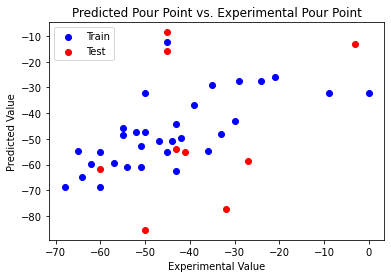

In [9]:
plt.title('Predicted Pour Point vs. Experimental Pour Point')
plt.xlabel('Experimental Value')
plt.ylabel('Predicted Value')
plt.scatter(y_train, y_train_pred, color='blue', label='Train')
plt.scatter(y_test, y_test_pred, color='red', label='Test')
plt.legend(loc='upper left')
plt.show()